<h2 style='color:blue' align='center'>Small Image Classification Using Convolutional Neural Network (CNN)</h2>

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

![avatar](small_images.jpg)

CIFAR-10数据集是一个用于监督学习训练的数据集，由60000个样本组成，每个样本都是一张32*32像素的RGB图像，共有10个类别，分别是飞机（airplane）、汽车（automobile）、鸟（bird）、猫（cat）、鹿（deer）、狗（dog）、青蛙（frog）、马（horse）、船（ship）和卡车（truck）。
以下是CIFAR-10数据集的出处链接：
[TensorFlow Datasets](https://www.tensorflow.org/datasets/catalog/cifar10)

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

Here we see there are 50000 training images and 1000 test images

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array

In [7]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [8]:
y_test = y_test.reshape(-1,)

In [9]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

Let's plot some images to see what they are 

In [10]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

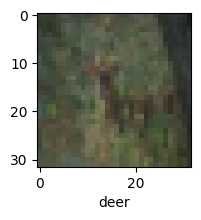

In [26]:
plot_sample(X_train, y_train, 10)

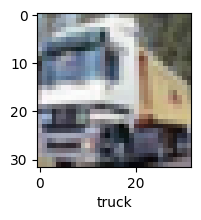

In [12]:
plot_sample(X_train, y_train, 1)

Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

<h4 style="color:purple">Normalizing the training data</h4>

In [13]:
X_train = X_train / 255.0
X_test = X_test / 255.0

<h4 style="color:purple">Build simple artificial neural network for image classification</h4>

In [14]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)



Epoch 1/5


1563/1563 [==============================] - 61s 38ms/step - loss: 1.8138 - accuracy: 0.3559
Epoch 2/5
1563/1563 [==============================] - 60s 38ms/step - loss: 1.6245 - accuracy: 0.4276
Epoch 3/5
1563/1563 [==============================] - 60s 38ms/step - loss: 1.5430 - accuracy: 0.4547
Epoch 4/5
1563/1563 [==============================] - 62s 40ms/step - loss: 1.4835 - accuracy: 0.4791
Epoch 5/5
1563/1563 [==============================] - 62s 39ms/step - loss: 1.4344 - accuracy: 0.4946


**You can see that at the end of 5 epochs, accuracy is at around 49%**

In [15]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 2s 7ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.65      0.39      0.48      1000
           1       0.56      0.66      0.61      1000
           2       0.33      0.41      0.36      1000
           3       0.28      0.39      0.32      1000
           4       0.56      0.17      0.27      1000
           5       0.35      0.42      0.38      1000
           6       0.41      0.69      0.51      1000
           7       0.59      0.53      0.56      1000
           8       0.59      0.65      0.62      1000
           9       0.73      0.26      0.38      1000

    accuracy                           0.46     10000
   macro avg       0.50      0.46      0.45     10000
weighted avg       0.50      0.46      0.45     10000



<h4 style="color:purple">Now let us build a convolutional neural network to train our images</h4>

In [16]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [17]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 15s 9ms/step - loss: 1.4383 - accuracy: 0.4822
Epoch 2/10
1563/1563 [==============================] - 14s 9ms/step - loss: 1.0887 - accuracy: 0.6180
Epoch 3/10
1563/1563 [==============================] - 15s 9ms/step - loss: 0.9566 - accuracy: 0.6654
Epoch 4/10
1563/1563 [==============================] - 13s 9ms/step - loss: 0.8719 - accuracy: 0.6981
Epoch 5/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.8026 - accuracy: 0.7214
Epoch 6/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.7429 - accuracy: 0.7408
Epoch 7/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.6884 - accuracy: 0.7596
Epoch 8/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.6344 - accuracy: 0.7777
Epoch 9/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.5853 - accuracy: 0.7949
Epoch 10/10
1563/1563 [==============================] - 12s 8ms/step - l

**With CNN, at the end 5 epochs, accuracy was at around 70% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features**

In [19]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.9583 - accuracy: 0.6983


[0.9582706093788147, 0.6983000040054321]

In [20]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 1s 3ms/step


array([[5.47434203e-03, 1.50264779e-04, 2.16622348e-03, 8.01496267e-01,
        3.97145329e-03, 9.68173742e-02, 7.39848148e-03, 1.40058026e-02,
        6.55730590e-02, 2.94682221e-03],
       [2.90070282e-04, 4.18267474e-02, 2.91242657e-07, 4.16082827e-07,
        2.96938012e-08, 3.56598084e-09, 4.76184539e-07, 2.31252031e-08,
        9.55340624e-01, 2.54131691e-03],
       [1.51937315e-02, 3.46157961e-02, 4.36219480e-03, 2.02598330e-02,
        9.13610449e-04, 5.72325953e-04, 2.54534394e-03, 8.02564144e-04,
        8.79473269e-01, 4.12612930e-02],
       [9.48755741e-01, 2.01395698e-04, 1.39896962e-04, 4.13682923e-04,
        4.26460261e-04, 5.95104029e-06, 2.77967683e-06, 8.33031954e-05,
        4.96490300e-02, 3.21566535e-04],
       [1.00227708e-05, 1.38728530e-04, 1.60975277e-01, 1.91182848e-02,
        4.11843449e-01, 2.93982797e-03, 4.04807597e-01, 1.37670247e-06,
        1.64629295e-04, 7.66728419e-07]], dtype=float32)

In [21]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [22]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

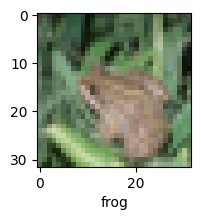

In [23]:
plot_sample(X_test, y_test,4)

In [24]:
classes[y_classes[4]]

'deer'

In [25]:
classes[y_classes[4]]

'deer'

In [27]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim
import time
import os
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

transform = transforms.Compose(
    [
        transforms.RandomHorizontalFlip(),
        transforms.RandomGrayscale(),
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

transform1 = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./cifar10_vgg', train=True, download=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=100, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./cifar10_vgg', train=False, download=False, transform=transform1)
testloader = torch.utils.data.DataLoader(testset, batch_size=50, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, 3, padding=1)
        self.conv2 = nn.Conv2d(64, 64, 3, padding=1)
        self.pool1 = nn.MaxPool2d(2, 2)
        self.bn1 = nn.BatchNorm2d(64)
        self.relu1 = nn.ReLU()

        self.conv3 = nn.Conv2d(64, 128, 3, padding=1)
        self.conv4 = nn.Conv2d(128, 128, 3, padding=1)
        self.pool2 = nn.MaxPool2d(2, 2, padding=1)
        self.bn2 = nn.BatchNorm2d(128)
        self.relu2 = nn.ReLU()

        self.conv5 = nn.Conv2d(128, 128, 3, padding=1)
        self.conv6 = nn.Conv2d(128, 128, 3, padding=1)
        self.conv7 = nn.Conv2d(128, 128, 1, padding=1)
        self.pool3 = nn.MaxPool2d(2, 2, padding=1)
        self.bn3 = nn.BatchNorm2d(128)
        self.relu3 = nn.ReLU()

        self.conv8 = nn.Conv2d(128, 256, 3, padding=1)
        self.conv9 = nn.Conv2d(256, 256, 3, padding=1)
        self.conv10 = nn.Conv2d(256, 256, 1, padding=1)
        self.pool4 = nn.MaxPool2d(2, 2, padding=1)
        self.bn4 = nn.BatchNorm2d(256)
        self.relu4 = nn.ReLU()

        self.conv11 = nn.Conv2d(256, 512, 3, padding=1)
        self.conv12 = nn.Conv2d(512, 512, 3, padding=1)
        self.conv13 = nn.Conv2d(512, 512, 1, padding=1)
        self.pool5 = nn.MaxPool2d(2, 2, padding=1)
        self.bn5 = nn.BatchNorm2d(512)
        self.relu5 = nn.ReLU()

        self.fc14 = nn.Linear(512 * 4 * 4, 1024)
        self.drop1 = nn.Dropout2d()
        self.fc15 = nn.Linear(1024, 1024)
        self.drop2 = nn.Dropout2d()
        self.fc16 = nn.Linear(1024, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.pool1(x)
        x = self.bn1(x)
        x = self.relu1(x)

        x = self.conv3(x)
        x = self.conv4(x)
        x = self.pool2(x)
        x = self.bn2(x)
        x = self.relu2(x)

        x = self.conv5(x)
        x = self.conv6(x)
        x = self.conv7(x)
        x = self.pool3(x)
        x = self.bn3(x)
        x = self.relu3(x)

        x = self.conv8(x)
        x = self.conv9(x)
        x = self.conv10(x)
        x = self.pool4(x)
        x = self.bn4(x)
        x = self.relu4(x)

        x = self.conv11(x)
        x = self.conv12(x)
        x = self.conv13(x)
        x = self.pool5(x)
        x = self.bn5(x)
        x = self.relu5(x)
        # print(" x shape ",x.size())
        x = x.view(-1, 512 * 4 * 4)
        x = F.relu(self.fc14(x))
        x = self.drop1(x)
        x = F.relu(self.fc15(x))
        x = self.drop2(x)
        x = self.fc16(x)

        return x

    def train_sgd(self, device):

        optimizer = optim.SGD(self.parameters(), lr=0.01)
        path = 'weights.tar'
        initepoch = 0

        if os.path.exists(path) is not True:
            loss = nn.CrossEntropyLoss()


        else:
            checkpoint = torch.load(path)
            self.load_state_dict(checkpoint['model_state_dict'])
            optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
            initepoch = checkpoint['epoch']
            loss = checkpoint['loss']

        for epoch in range(initepoch, 20):  # loop over the dataset multiple times
            timestart = time.time()

            running_loss = 0.0
            total = 0
            correct = 0
            for i, data in enumerate(trainloader, 0):
                # get the inputs
                inputs, labels = data
                inputs, labels = inputs.to(device), labels.to(device)

                optimizer.zero_grad()

                outputs = self(inputs)
                l = loss(outputs, labels)
                l.backward()
                optimizer.step()

                running_loss += l.item()

                if i % 500 == 499:
                    print('[%d, %5d] loss: %.4f' %
                          (epoch, i, running_loss / 500))
                    running_loss = 0.0
                    _, predicted = torch.max(outputs.data, 1)
                    total += labels.size(0)
                    correct += (predicted == labels).sum().item()
                    print('Accuracy of the network on the %d tran images: %.3f %%' % (total,
                                                                                      100.0 * correct / total))
                    total = 0
                    correct = 0
                    torch.save({'epoch': epoch,
                                'model_state_dict': net.state_dict(),
                                'optimizer_state_dict': optimizer.state_dict(),
                                'loss': loss
                                }, path)

            print('epoch %d cost %3f sec' % (epoch, time.time() - timestart))

        print('Finished Training')

    def test(self, device):
        correct = 0
        total = 0
        with torch.no_grad():
            for data in testloader:
                images, labels = data
                images, labels = images.to(device), labels.to(device)
                outputs = self(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        print('Accuracy of the network on the 10000 test images: %.3f %%' % (100.0 * correct / total))

    def classify(self, device):
        class_correct = list(0. for i in range(10))
        class_total = list(0. for i in range(10))
        for data in testloader:
            images, labels = data
            images, labels = images.to(device), labels.to(device)
            outputs = self(images)
            _, predicted = torch.max(outputs.data, 1)
            c = (predicted == labels).squeeze()
            for i in range(4):
                label = labels[i]
                class_correct[label] += c[i]
                class_total[label] += 1

        for i in range(10):
            print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))


if __name__ == '__main__':
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    net = Net()
    net = net.to(device)
    net.train_sgd(device)
    net.test(device)
    net.classify(device)


100%|██████████| 170498071/170498071 [00:25<00:00, 6599119.89it/s] 


Extracting ./cifar10_vgg\cifar-10-python.tar.gz to ./cifar10_vgg
Files already downloaded and verified


c:\Users\shan\.conda\envs\PytorchCpu\lib\site-packages\torch\nn\functional.py:1345: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


[0,   499] loss: 1.6531
Accuracy of the network on the 100 tran images: 52.000 %
epoch 0 cost 369.191658 sec


KeyboardInterrupt: 

<h3 style='color:purple'>Exercise</h3>

Use CNN to do handwritten digits classification using MNIST dataset. You can use this notebook as a reference:
https://github.com/codebasics/deep-learning-keras-tf-tutorial/blob/main/1_digits_recognition/digits_recognition_neural_network.ipynb

Above we used ANN for digits classification. You need to modify this code to use CNN instead. Check how accuracy improves fast with CNN and figure out how CNN can be a better choice for doing image classification compared to ANN. Once you have worked on this problem on your own, you can check my solution by clicking on this link: [Solution](https://github.com/codebasics/deep-learning-keras-tf-tutorial/blob/main/16_cnn_cifar10_small_image_classification/cnn_mnist_exercise_solution.ipynb)